In [1]:
import numpy as np 
import matplotlib.pyplot as p
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D

def montecarlo(N,t):
    a = np.array([1,0])
    b = np.array([-1,0])
    c = np.array([0,1])
    d = np.array([0,-1])
    arr = np.array([a,b,c,d])
    vec = np.random.randint(0,4,(N,t))
    return arr[vec].sum(axis=1)

def P(x,y,t):
    return 1/t/np.pi*np.exp(-(x**2+y**2)/t)



# Task 1.1

In [30]:
matriz = np.loadtxt('test.dat')
matriz


array([[  11.,   34.],
       [  10.,   29.],
       [-121.,   14.],
       ...,
       [ -19.,  -15.],
       [   2.,  -68.],
       [  47.,  -21.]])

In [31]:
len(matriz)

12000000

In [ ]:
arr = np.concatenate([matriz,matriz2])
maxx = 200

binada = np.arange(-(maxx+0.5),maxx+1)
aux = np.arange(-maxx,maxx+1)

z = np.histogram2d(arr[:,0],arr[:,1],bins = [binada,binada])

x,y = np.meshgrid(aux,aux)

xx = x.ravel()
yy = y.ravel()
zz = z[0].ravel()


fig = p.figure()
fig, ax = p.subplots(subplot_kw={"projection": "3d"}, figsize=(9,8))



surf = ax.plot_surface(x, y, z[0], rstride=1,cstride=1,cmap=cm.PuOr)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Histogram for $N = 12 \times 10^6$ and $t = 5000$')
p.savefig('histappend.eps', format = 'eps')
p.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

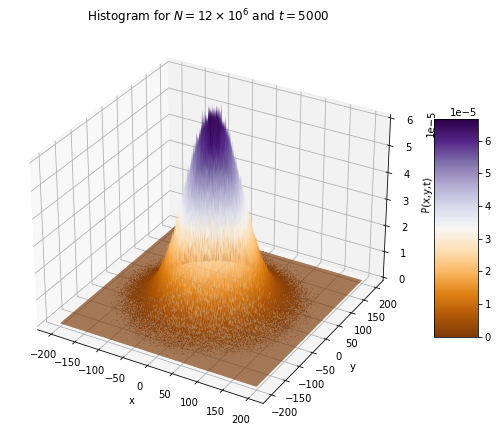

In [172]:
arr = np.concatenate([matriz,matriz2])
maxx = 200

binada = np.arange(-(maxx+0.5),maxx+1)
aux = np.arange(-maxx,maxx+1)

z = np.histogram2d(arr[:,0],arr[:,1],bins = [binada,binada],density = True)

x,y = np.meshgrid(aux,aux)

xx = x.ravel()
yy = y.ravel()
zz = z[0].ravel()


fig = p.figure()
fig, ax = p.subplots(subplot_kw={"projection": "3d"}, figsize=(9,8))



surf = ax.plot_surface(x, y, z[0], rstride=1,cstride=1,cmap=cm.PuOr)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x,y,t)')
ax.set_zlim(0,0.00006)
ax.set_title(r'Histogram for $N = 12 \times 10^6$ and $t = 5000$')
p.savefig('hist1.eps', format = 'eps')
p.show()


In [148]:
z = np.copy(z[0])
normalization = z.sum()
xmean = (x*z).sum()
ymean = (y*z).sum()
xy = ((x**2+y**2)*z).sum()
print('normalization = ' + str(normalization))
print('x mean = '+str(xmean))
print('y mean = '+str(ymean))
print('x^2 + y^2  = '+str(xy))

normalization = 0.9999999999999999
x mean = 0.020710550350869956
y mean = -0.003126427082910093
x^2 + y^2  = 4993.4089091824435


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


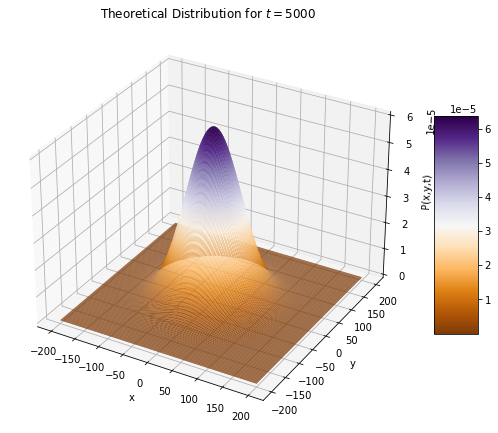

In [173]:
maxx = 200
t = 5000

aux = np.arange(-maxx,maxx+1)

x,y = np.meshgrid(aux,aux)


fig, ax = p.subplots(subplot_kw={"projection": "3d"}, figsize=(9,8))
#ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, P(x,y,t), rstride=2,cstride=2,cmap=cm.PuOr)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('P(x,y,t)')
ax.set_zlim(0,0.00006)
ax.set_title(r'Theoretical Distribution for $t = 5000$')
p.savefig('teor1.eps', format = 'eps')

In [171]:
maxx= 200
t = 5000
aux = np.arange(-maxx,maxx+1)
x,y = np.meshgrid(aux,aux)
#(P(x,y,t)/P(0,0,t))[200][200]
(5000*P(x,y,t)/P(0,0,t)).sum()

78530281.64974412

# Task 1.2 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


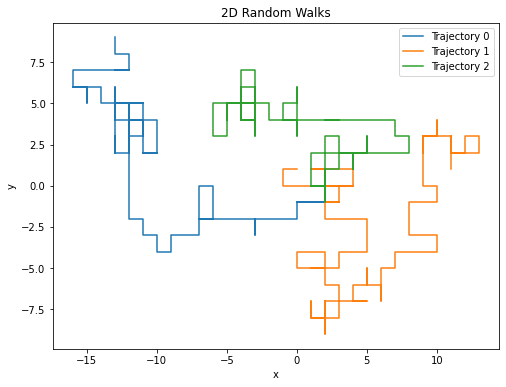

In [161]:
def traj(t):
    aux = np.zeros((t,2))
    a = np.array([1,0])
    b = np.array([-1,0])
    c = np.array([0,1])
    d = np.array([0,-1])
    arr = np.array([a,b,c,d])
    
    x0 = np.zeros(2)
    for i in range (t):
        vec = np.random.randint(0,4)
        x0 += arr[vec]
        aux[i]= x0
    return aux


n = 3

fig = p.figure(figsize = (8,6))

i = 1
for i in range(n):
    trajj = traj(100)
    x = trajj[:,0]
    y = trajj[:,1]
    p.plot(x,y,label = 'Trajectory ' + str(i))
    i += 1


p.xlabel('x')
p.ylabel('y')
p.title('2D Random Walks')
p.legend()
p.savefig('rand.eps',format = 'eps')
p.show()
    

# Task 2.1 

In [36]:
import numpy as np 
import matplotlib.pyplot as p

def funcs(N,t):
    F = np.zeros(t)
    S = np.zeros(t)
    x = np.zeros(N)
    for i in range(t):
        
        x += np.random.choice([-1,1,0],p=[0.25,0.25,0.5],size = N)

        ind = np.where(x != -30)[0]
        xn = x[ind]
        nn = len(xn)
        F[i]  = N-nn
        S[i] = nn
        N = nn
        x = np.copy(xn)
        
    return F,S
    
    

N= 500000
t = 10000
F,S = funcs(N,t)


            

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


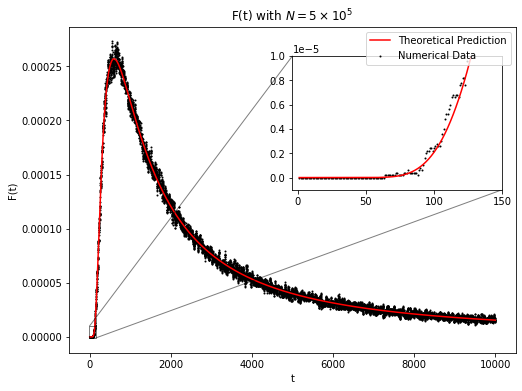

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


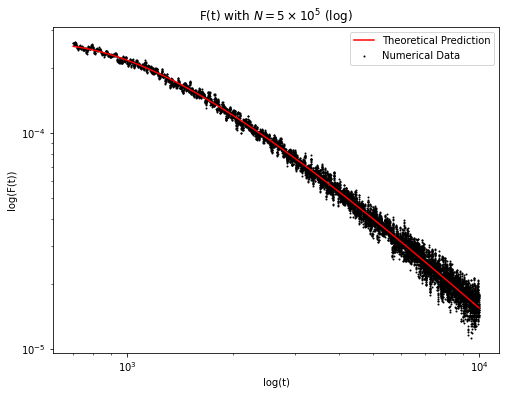

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


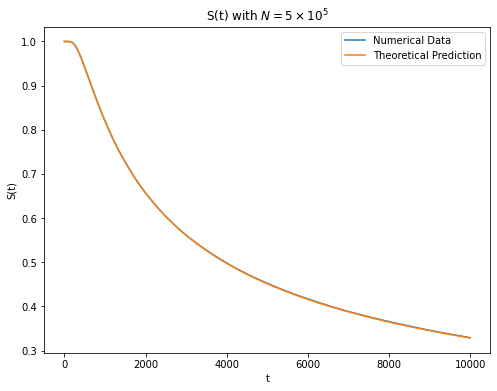

In [145]:
import scipy.special as sp 

N= 500000
t = 10000


def FF(t):
    D = 1/4
    return 30/np.sqrt((4*np.pi*D*t**3))*np.exp(-30**2/(4*D*t))


def window(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


T = np.arange(1,t)

w = 10


fig, ax = p.subplots(figsize=[8, 6])

sizez = 1

vmac = 600

Ff = window(F,w)
ax.scatter(T[:-w+2],Ff/N,s = sizez ,label = 'Numerical Data',color = 'black')
ax.plot(T,FF(T),label = 'Theoretical Prediction',color = 'red')
ax.vlines(vmac,ymin = -0.00001,ymax = 0.00026,ls = '--', color = 'green', label= 'Maximum t = ' + str(vmac))
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.41])

axins.scatter(T[:-w+2],Ff/N,s = 3,color = 'black')
axins.plot(T,FF(T),color = 'red')

x1, x2, y1, y2 = -4, 150, -0.000001, 0.00001
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)



ax.set_title(r'F(t) with $N = 5\times 10^{5}$')
ax.set_xlabel('t')
ax.set_ylabel('F(t)')
ax.set_ylim(-0.00001,0.00028)
ax.legend()
ax.indicate_inset_zoom(axins, edgecolor="black")
p.savefig('ffunc.eps',format = 'eps')
p.show()




fig = p.figure(figsize = (8,6))

p.plot(S/N,label = 'Numerical Data')
p.plot(sp.erf(30/np.sqrt(T)),label = 'Theoretical Prediction')
p.title(r'S(t) with $N = 5\times 10^{5}$')
p.xlabel('t')
p.ylabel('S(t)')
p.legend()
p.savefig('sfunc.eps',format = 'eps')
p.show()



In [ ]:
N= 50000
t = 50000
F3,S3 = funcs(N,t)



In [ ]:
N= 50000
t = 50000

T = np.arange(1,t)

w = 100

Ff3 = window(F3,w)

fig = p.figure(figsize = (8,6))

flag = 5000
p.scatter(T[flag:-w+2],Ff3[flag:]/N,s = sizez,label = 'Numerical Data',color = 'black')
p.plot(T[flag:],FF(T[flag:]),label = 'Theoretical Prediction',color = 'red')
p.xscale('log')
p.yscale('log')
p.ylim()
p.title(r'F(t) with $N = 5\times 10^{5}$ (log)')
p.xlabel('log(t)')
p.ylabel('log(F(t))')
p.legend()
p.savefig('ffunclog.eps',format = 'eps')
p.show()

fig = p.figure(figsize = (8,6))

flag2 = 5000

p.plot(T[flag2:],S3[flag2:-1]/N,label = 'Numerical Data')
p.plot(T[flag2:],sp.erf(30/np.sqrt(T[flag2:])),label = 'Theoretical Prediction')
p.title(r'S(t) with $N = 5\times 10^{5}$ (log-log plot)')
p.xlabel('log(t)')
p.ylabel('log(S(t))')
p.xscale('log')
p.yscale('log')
p.legend()
p.savefig('sfunclog.eps',format = 'eps')
p.show()

In [ ]:
import numpy as np 
import matplotlib.pyplot as p

def funcs2(N,t):
    F2 = np.zeros(t)
    x = np.zeros(N)
    for i in range(t):
        
        x += np.random.choice([-1,1,0],p=[0.25,0.25,0.5],size = N)

        ind = np.where(x == -30)[0]
        xn = x[ind]
        nn = len(xn)
        F2[i]  = nn
        
    return F2
    
    

N= 500000
t = 6000
F2 = funcs2(N,t)

In [ ]:
import scipy.special as sp 

def window(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

N= 500000
t = 6000
T = np.arange(1,t)



w = 100


fig, ax = p.subplots(figsize=[8, 6])

sizez = 1

Ff = window(F2,w)
print(np.where(Ff==np.max(Ff))[0])
ax.scatter(T[:-w+2],Ff/N,s = sizez ,label = 'Numerical Data',color = 'black')
p.vlines(x = 1800,ymin = 0,ymax = 0.008, ls= '--',color = 'red',label = 'Maximum')
p.ylim(0,0.009)

axins = ax.inset_axes([0.5, 0.1, 0.47, 0.41])

axins.scatter(T[:-w+2],Ff/N,s = sizez,color = 'black')
axins.vlines(x = 1800,ymin = 0,ymax = 0.008, ls= '--',color = 'red')

x1, x2, y1, y2 = 1000, 2000, 0.0074, 0.0083
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)



ax.set_title(r'Probability of hitting $x_c=-30')
ax.set_xlabel('t')
ax.set_ylabel('p(t)')
ax.legend()
ax.indicate_inset_zoom(axins, edgecolor="black")
p.savefig('ffuncappend.eps',format = 'eps')
p.show()



p.show()


# task 3.1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


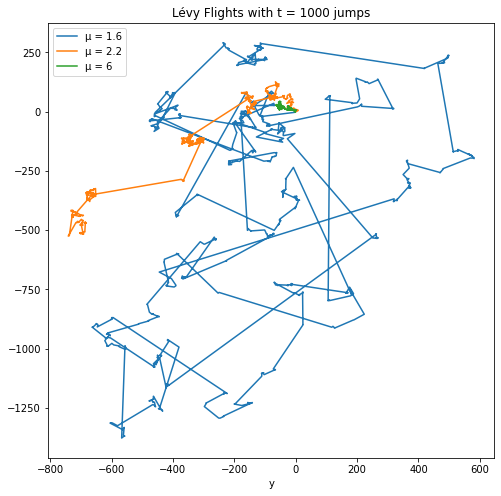

In [80]:
def levy(t,mu):

    pos = np.zeros((t,2))
    aux = np.zeros(2)
    for i in range(t):
        x1, y1 = np.random.rand(2)
        l = 1/(1-x1*(1-1000**(1-mu)))**(1/(mu-1))
        phi = 2*np.pi*y1

        aux += l*np.array([np.cos(phi),np.sin(phi)])
        pos[i] = aux
    return pos

t = 1000
fig = p.figure(figsize = (8,8))
for mu in [1.6,2.2,6]:
    pos = levy(t,mu)
    x = pos[:,0]
    y = pos[:,1]
    p.plot(x,y,label = 'μ = ' + str(mu))
    
p.title('Lévy Flights with t = 1000 jumps')
p.xlabel('x')
p.xlabel('y')
p.legend()
p.savefig('levy.eps', format = 'eps')
p.show()
    
    
        
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


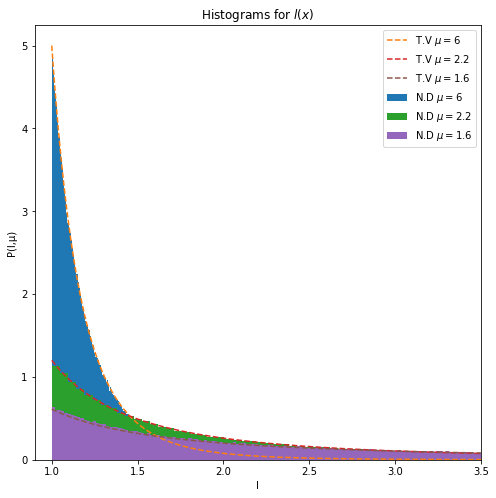

In [162]:
def ppp(l,mu):
    c = (mu-1)/(1-1000**(1-mu))
    return c/l**mu

fig = p.figure(figsize = (8,8))
binagem = np.linspace(1,75,4000)

for mu in [6,2.2,1.6]:
    N = 500000

    x = np.random.rand(N)
    l = 1/(1-x*(1-1000**(1-mu)))**(1/(mu-1))
    if mu == 1.6:
        p.hist(l,bins = binagem, density = True,alpha =1, label = r'N.D $\mu = $'+ str(mu))
    else:
        p.hist(l,bins = 'auto', density = True,alpha =1, label = r'N.D $\mu = $'+ str(mu))

    L = np.linspace(1,200,N)
    p.plot(L,ppp(L,mu),'--', label = r'T.V $\mu = $'+ str(mu))
p.xlim(0.9,3.5)
p.xlabel("l")
p.ylabel("P(l,μ)")
p.title(r'Histograms for $l(x)$')
p.legend()
p.savefig('histpl.eps',format = 'eps')
p.show()